# **Lista de ejercicios (13 de octubre, 2024)**
## Introducción a Machine Learning para CCSS

### Integrantes: 

- Victoria Olivera
- Victor 
- Fernando Mendoza Canal (20105246)
- Paolo Gutierrez Chochoca (F1120328)



#### Instrucciones

1. Temas abordados: Esta lista de ejercicios se enfoca en los siguientes temas: Gradient
Descent, Trade off Bias Variance & Cross-Validation.
2. Formación de grupos: Se permite la formación de grupos de hasta 4 integrantes. La
composición de los grupos se mantendrá constante para las listas de ejercicios 2 y 3.
3. Puntuaci ́on de ejercicios: La lista contiene 4 ejercicios. Cada ejercicio vale 5 puntos.
4. Formato de entrega: La resoluci ́on de los ejercicios debe presentarse en un archivo jupyter-
notebook con todas las celdas ejecutadas.
5. Fecha límite de entrega: La fecha límite para la entrega es el Domingo 20 de octubre a
las 11:59 pm. Un representante del equipo debe subir su solucionario a la actividad correspondiente en la plataforma Canvas. Los nombres y códigos de todos los participantes deben
ser incluidos en el solucionario.

### **Libraries**

In [285]:
#!pip install mlxtend

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mlxtend.evaluate import bias_variance_decomp

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.preprocessing import PolynomialFeatures

### **Pregunta 1**

#### En este ejercicio, estimará los coeficientes de un modelo de regresión lineal utilizando el conjunto de datos Boston. Tenga en cuenta que la variable objetivo es ‘crim‘, que representa la tasa de criminalidad per cápita por ciudad. Considere los siguientes pasos:

In [26]:
# Load the hitters dataset
hitters = pd.read_csv('https://raw.githubusercontent.com/qlabpucp/datasets/main/datasets/boston.csv')

# Drop string columns
hitters = hitters.drop(columns=['Unnamed: 0'])

# Dop missing values
hitters = hitters.dropna()

# Splitting into input and target variables
x = hitters.drop('crim', axis=1)
y = hitters['crim']

# Scaling data
x_scaled = scale(x)
y_scaled = scale(y)

#### **1.** Ajuste un modelo de Mínimos Cuadrados Ordinarios (OLS) y estime los coeficientes mediante el atributo coef . 
Hint: considere la biblioteca Scikit-Learn.

In [32]:
# Fit a linear regression model
model = LinearRegression(fit_intercept=False)
model.fit(x_scaled, y_scaled)

LinearRegression(fit_intercept=False)

In [36]:
# Estimate coefficients
print(model.coef_)

[ 0.12393939 -0.04653842 -0.02437248 -0.1341459   0.05137256 -0.00277602
 -0.24780411  0.6199926  -0.07397933 -0.07653287  0.1152332  -0.23529275]


In [40]:
coefs_df = pd.DataFrame(data=model.coef_, columns=["Coefs - Attribute"], index=x.columns)
coefs_df

,Coefs - Attribute
zn,0.123939
indus,-0.046538
chas,-0.024372
nox,-0.134146
rm,0.051373
age,-0.002776
dis,-0.247804
rad,0.619993
tax,-0.073979
ptratio,-0.076533


#### **2.** Estime manualmente los coeficientes OLS y comparelos con los resultados obtenidos en el paso anterior. Considere que los coeficientes se pueden estimar minimizando la Suma Residual de Cuadrados (RSS). 
Hint: la Suma Residual de Cuadrados se define como:

$$
RSS = (y − Xβ)′ (y − Xβ)
$$

In [43]:
Xtx = np.dot(x_scaled.T, x_scaled)
Xty = np.dot(x_scaled.T, y_scaled)
beta = np.linalg.solve(Xtx, Xty)
print(beta)

[ 0.12393939 -0.04653842 -0.02437248 -0.1341459   0.05137256 -0.00277602
 -0.24780411  0.6199926  -0.07397933 -0.07653287  0.1152332  -0.23529275]


* En la siguiente tabla se muestra la comparación de los coficientes calculados automáticamente por la librería LinearRegression (coefs-attribute) y los resultados obtenidos del cálculo manual mediante la minimización del RSS (coefs-beta). En resumen, los resultados obtenidos por ambos métodos son relativamente idénticos.

In [50]:
coefs_df['Coefs - Beta'] = beta
coefs_df

,Coefs - Attribute,Coefs - Beta
zn,0.123939,0.123939
indus,-0.046538,-0.046538
chas,-0.024372,-0.024372
nox,-0.134146,-0.134146
rm,0.051373,0.051373
age,-0.002776,-0.002776
dis,-0.247804,-0.247804
rad,0.619993,0.619993
tax,-0.073979,-0.073979
ptratio,-0.076533,-0.076533


#### **3.** Estime los coeficientes OLS mediante el algoritmo de optimizaci ́on de Descenso de Gradiente. Experimente con distintos valores para la Tasa de Aprendizaje (Learning Rate) y el Umbral de Convergencia (Convergence Threshold ). Compare los coeficientes obtenidos con aquellos obtenidos en los pasos a) y b). ¿Qué valores de Tasa de Aprendizaje y Umbral de Convergencia proporcionan resultados más cercanos a los obtenidos anteriormente?

In [176]:
# Initialize weights randomly
w0 = np.random.uniform(size=x_scaled.shape[1])

# Set the learning rate
alpha = 0.0002

w1 = w0.copy()

# Set a loop that will continue untl break condition is met
while True:

    # Calculate predictions
    predictions = np.dot(x_scaled, w0)
    # Calculate errors
    errors = y_scaled - predictions
    # Calculate gradient (direction to adjust weights to minimize the loss function)
    gradient = -2 * np.dot(x_scaled.T, errors)
    # Update weights
    w1 = w0 - alpha * gradient

    # Check for convergence
    if np.allclose(w1, w0, atol=1e-4):
        break

    # Prepare for the next iteration
    w0 = w1.copy()

# Print final weights
print(w1)

[ 0.12261135 -0.04939755 -0.02419184 -0.13231028  0.05149838 -0.00338033
 -0.24653011  0.61279785 -0.06577991 -0.0756542   0.11688039 -0.23312091]


In [179]:
coefs_df['Coefs - GD'] = w1
coefs_df

,Coefs - Attribute,Coefs - Beta,Coefs - GD
zn,0.123939,0.123939,0.122611
indus,-0.046538,-0.046538,-0.049398
chas,-0.024372,-0.024372,-0.024192
nox,-0.134146,-0.134146,-0.132310
rm,0.051373,0.051373,0.051498
age,-0.002776,-0.002776,-0.003380
dis,-0.247804,-0.247804,-0.246530
rad,0.619993,0.619993,0.612798
tax,-0.073979,-0.073979,-0.065780
ptratio,-0.076533,-0.076533,-0.075654


In [184]:
# Initialize weights randomly
w0 = np.random.uniform(size=x_scaled.shape[1])

# Set the learning rate
alpha = 0.00015

w2 = w0.copy()

# Set a loop that will continue untl break condition is met
while True:

    # Calculate predictions
    predictions = np.dot(x_scaled, w0)
    # Calculate errors
    errors = y_scaled - predictions
    # Calculate gradient (direction to adjust weights to minimize the loss function)
    gradient = -2 * np.dot(x_scaled.T, errors)
    # Update weights
    w2 = w0 - alpha * gradient

    # Check for convergence
    if np.allclose(w2, w0, atol=1e-5):
        break

    # Prepare for the next iteration
    w0 = w2.copy()

# Print final weights
print(w2)

[ 0.12379957 -0.04692738 -0.02433627 -0.13402775  0.05139808 -0.00284363
 -0.24776975  0.61904146 -0.07285769 -0.0764585   0.11538078 -0.2351181 ]


* Observamos que a medida que la tasa de convergencia y el umbral de convergencia sean más pequeños (ver coefs-GD-2) los resultados se acercan más a las estimaciones en los puntos a y b.

In [189]:
coefs_df['Coefs - GD-2'] = w2
coefs_df

,Coefs - Attribute,Coefs - Beta,Coefs - GD,Coefs - GD-2
zn,0.123939,0.123939,0.122611,0.123800
indus,-0.046538,-0.046538,-0.049398,-0.046927
chas,-0.024372,-0.024372,-0.024192,-0.024336
nox,-0.134146,-0.134146,-0.132310,-0.134028
rm,0.051373,0.051373,0.051498,0.051398
age,-0.002776,-0.002776,-0.003380,-0.002844
dis,-0.247804,-0.247804,-0.246530,-0.247770
rad,0.619993,0.619993,0.612798,0.619041
tax,-0.073979,-0.073979,-0.065780,-0.072858
ptratio,-0.076533,-0.076533,-0.075654,-0.076458


### **Pregunta 2**

#### El objetivo de este ejercicio es ilustrar cómo el trade-off entre sesgo y varianza evoluciona con la creciente complejidad de los modelos polinómicos. Para este propósito, utilice el conjunto de datos Portafolio. Considere los siguientes pasos:


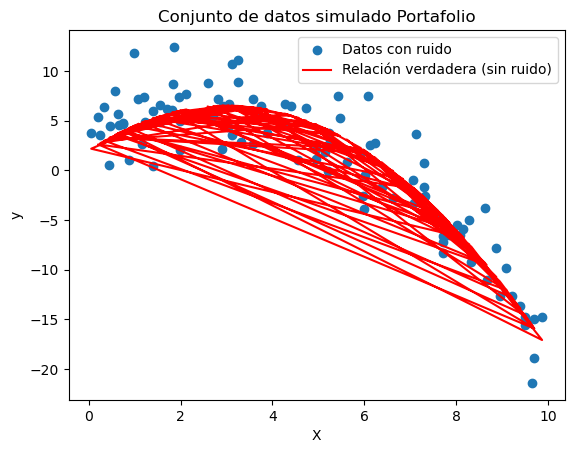

In [182]:
# Generar los datos para el dataset simulado "Portafolio"
np.random.seed(42)

# Variable independiente (X)
X = np.random.uniform(0, 10, 100)

# Crear una relación polinómica (y = 2 + 3x - 0.5x^2) + ruido
y_true = 2 + 3 * X - 0.5 * X**2
ruido = np.random.normal(0, 3, size=X.shape)
y = y_true + ruido

# Convertir en DataFrame
portafolio = pd.DataFrame({'X': X, 'y': y})

# Visualizar el dataset generado
plt.scatter(X, y, label='Datos con ruido')
plt.plot(X, y_true, color='red', label='Relación verdadera (sin ruido)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Conjunto de datos simulado Portafolio')
plt.legend()
plt.show()

#### **1)** División del conjunto de datos: Separe los datos en un conjunto de entrenamiento y otro de prueba, asignando el 20% de los datos al conjunto de prueba.



In [184]:
# División en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(portafolio[['X']], 
                                                    portafolio['y'], 
                                                    test_size=0.2, 
                                                    random_state=42)

#### **2)** Ajuste de modelos polinómicos: Implemente un bucle para ajustar modelos de regresión polinomial desde grado 1 hasta grado 8. 

Hint: considere las funciones PolynomialFeatures y LinearRegression de Scikit-Learn.

In [289]:
# Bucle sobre el grado polinómico (del 1 al 8)
for degree in range(1, 9):
    # Crear características polinómicas
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Ajustar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predecir en conjunto de entrenamiento y prueba
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Calcular MSE
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Convertir los DataFrames de pandas a NumPy arrays
    X_train_poly_np = X_train_poly
    X_test_poly_np = X_test_poly
    y_train_np = y_train.values
    y_test_np = y_test.values

    # Calcular descomposición sesgo-varianza usando mlxtend
    avg_expected_loss, avg_bias, avg_variance = bias_variance_decomp(
        model, X_train_poly_np, y_train_np, X_test_poly_np, y_test_np, loss='mse', random_seed=42)

    # Almacenar los resultados
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)
    bias_list.append(avg_bias)
    variance_list.append(avg_variance)

#### **3)** Descomposición sesgo-varianza: Dentro del mismo bucle, calcule la descomposición de sesgo-varianza para cada modelo, tanto en el conjunto de entrenamiento como en el de prueba. 

Hint: considere la librer ́ıa mlxtend.


#### **4)** Visualización: Grafique cómo sesgo, varianza y error cuadrático medio (MSE) varían con la complejidad del modelo (grados polinómicos) para ambos conjuntos, entrenamiento y prueba.

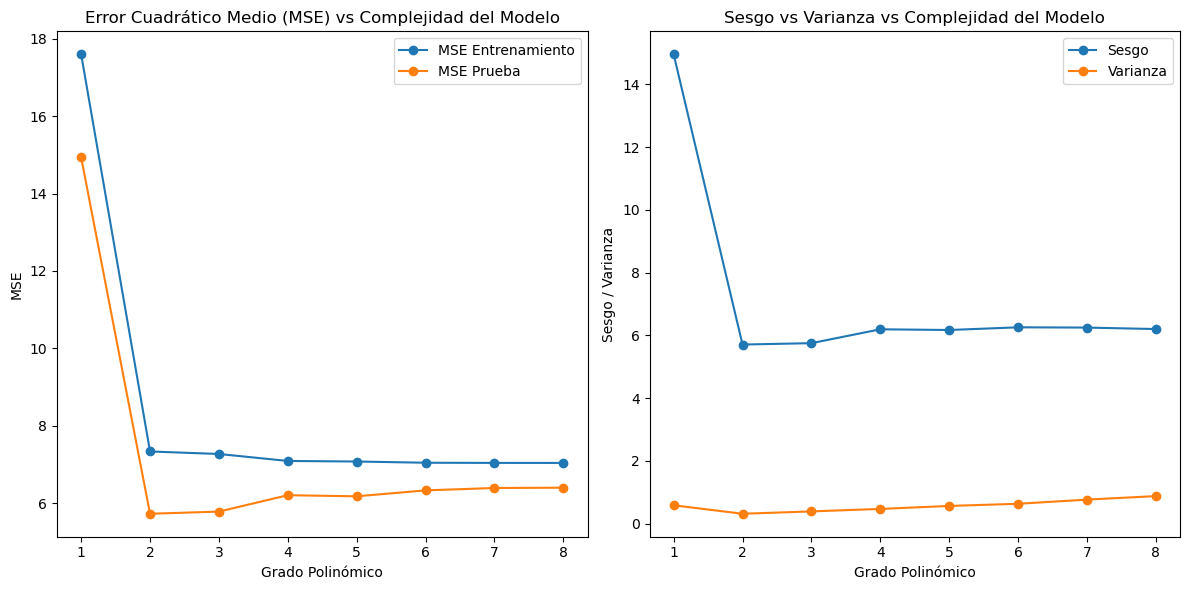

In [291]:
# Visualización de los resultados
degrees = range(1, 9)

# Asegurarse de que las listas tengan la longitud correcta
train_mse_list = train_mse_list[:8]
test_mse_list = test_mse_list[:8]
bias_list = bias_list[:8]
variance_list = variance_list[:8]

# Gráfico del MSE para conjunto de entrenamiento y prueba
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(degrees, train_mse_list, label='MSE Entrenamiento', marker='o')
plt.plot(degrees, test_mse_list, label='MSE Prueba', marker='o')
plt.xlabel('Grado Polinómico')
plt.ylabel('MSE')
plt.title('Error Cuadrático Medio (MSE) vs Complejidad del Modelo')
plt.legend()

# Gráfico de sesgo y varianza
plt.subplot(1, 2, 2)
plt.plot(degrees, bias_list, label='Sesgo', marker='o')
plt.plot(degrees, variance_list, label='Varianza', marker='o')
plt.xlabel('Grado Polinómico')
plt.ylabel('Sesgo / Varianza')
plt.title('Sesgo vs Varianza vs Complejidad del Modelo')
plt.legend()

plt.tight_layout()
plt.show()

### **Pregunta 3**


#### Sobre k-fold Cross-Validation:


#### **1)** Explique cómo se implementa el enfoque k-fold Cross-Validation.


El enfoque de k-fold Cross-Validation es una técnica para evaluar la performance de un modelo de machine learning, dividiendo los datos en k subconjuntos (folds) de igual tamaño. El procedimiento básico es el siguiente:

1. División de datos: Se divide el conjunto de datos original en k pliegues (o partes) de tamaño similar.
2. Entrenamiento y validación: En cada iteración, uno de los pliegues se utiliza como conjunto de validación, mientras que los k-1 pliegues restantes se usan para entrenar el modelo.
3. Iteración: Este proceso se repite k veces, cada vez utilizando un pliegue diferente como conjunto de validación.
4. Promedio de resultados: Se calculan las métricas de evaluación (ej. precisión, error) para cada iteración y luego se promedia el resultado final, lo que proporciona una estimación robusta del rendimiento del modelo.

#### **2)** Detalle cuáles son las ventajas y desventajas del enfoque k-fold Cross-Validation con respecto a:

#### **I.** El enfoque del Conjunto de Validación.

Ventajas:

    Menor sesgo: K-fold CV aprovecha mejor los datos ya que cada instancia se usa tanto para entrenar como para validar en diferentes pliegues, a diferencia del enfoque de validación por conjunto fijo, donde el conjunto de validación se usa una sola vez, lo que puede introducir variabilidad en los resultados.
    Mayor robustez: El rendimiento promedio en k-fold es más estable y representativo que en la validación con un solo conjunto de validación, que puede ser sensible a la forma en que se dividen los datos.

Desventajas:

    Mayor costo computacional: k-fold CV requiere entrenar y validar el modelo k veces, lo que puede ser costoso en términos de tiempo y recursos computacionales, especialmente para modelos complejos.
    Complejidad en implementación: El enfoque de conjunto de validación es más simple y rápido de implementar, lo que puede ser una ventaja en algunos casos, mientras que k-fold implica más pasos.

#### **II.** El enfoque de Validación Cruzada Dejando Uno Afuera (LOOCV)

Ventajas:

    Menor costo computacional: En k-fold CV, se realizan k entrenamientos, mientras que en LOOCV se realizan tantas iteraciones como instancias hay en el conjunto de datos (una por cada observación), lo que puede ser prohibitivo en conjuntos grandes.
    Menor varianza: Al usar grupos más grandes para entrenar el modelo en cada pliegue, k-fold tiende a tener una varianza menor en comparación con LOOCV, que usa solo un ejemplo para la validación en cada iteración.

Desventajas:

    Mayor sesgo: LOOCV es menos sesgado, ya que en cada iteración se entrena el modelo con casi todos los datos disponibles, mientras que en k-fold, el modelo se entrena con una porción más pequeña (k-1 folds). Esto puede hacer que k-fold sea ligeramente menos preciso.
    Uso completo de los datos: LOOCV aprovecha al máximo los datos, lo que puede ser útil cuando se dispone de un conjunto de datos pequeño, mientras que k-fold usa un subconjunto más pequeño en cada iteración.

### **Pregunta 4**


#### A continuación implementará Cross-Validation para un conjunto de datos simulado. Considere los siguientes pasos:

#### **1)** Genere el conjunto de datos simulado de la siguiente manera:

    rng = np.random.default_rng(1)

    x = rng.normal(size=100)

    y = x - 2 * x^2 + rng.normal(size=100)

#### En este conjunto de datos, ¿cuál es n (número de observaciones) y cuál es p (número de variables predictoras)? Escriba el modelo utilizado para generar los datos en forma de ecuación.

In [300]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x ** 2 + rng.normal(size=100)

**Respuesta:**

$$
y = x - 2 \cdot x ^ 2 + \epsilon
$$

El número de observaciones es 100 y el número de variables predictoras es 1 (solo $x$).

#### **2)** Establezca una semilla aleatoria y luego calcule los errores LOOCV que resultan de ajustar los siguientes cuatro modelos polinomiales usando mínimos cuadrados:

   i.$$ Y = β_0 + β_1X + ε $$

   ii. $$ Y = β_0 + β_1X + β_2X_2 + ε $$

   iii. $$ Y = β_0 + β_1X + β_2X_2 + β_3X_3 + ε $$

   iv. $$ Y = β0 + β_1X + β_2X_2 + β_3X_3 + β_4X_4 + ε $$



In [302]:
# Definiendo una funcion que calcula el promedio del MSE de LLOCV para un modelo de regresion polinomial en un conjuntos de datos
def calcular_loocv_error(X, y, grado):

    # Crea las características polinomiales
    poly = PolynomialFeatures(degree=grado)
    X_poly = poly.fit_transform(X)
    
    # Seteando LOOCV
    loo = LeaveOneOut()

    # Lista donde se almacenara los errores de cada iteracion
    errors = []

    # Ajusta el modelo en cada iteración de LOOCV
    for train_index, test_index in loo.split(X_poly):

        # Divide X en la matriz de train y test
        X_train, X_test = X_poly[train_index], X_poly[test_index]

        # Divide y en la matriz de train y test
        y_train, y_test = y[train_index], y[test_index]

        # Ajustando un modelo lineal
        modelo = LinearRegression()
        modelo.fit(X_train, y_train)

        # Prediciendo en el X test
        y_pred = modelo.predict(X_test)

        # Calcular error cuadrático para cada observación (LOOCV)
        error = mean_squared_error([y_test], [y_pred])
        errors.append(error)

    # Promediando los errores de cada iteración para obtener el MSE de LOOCV
    return float(np.mean(errors))

In [304]:
# Cambiando la forma de la matriz X
X = x.reshape(-1, 1)

# Diccionario donde se guardaran los resultados
errores_loocv = {}

# Calculando los errores LOOCV para cada modelo polinomial
for grado in range(1, 5):
    error = calcular_loocv_error(X, y, grado)
    errores_loocv[f'Polinomio de grado {grado}'] = error

errores_loocv

{'Polinomio de grado 1': 6.633029839181983,
 'Polinomio de grado 2': 1.122936856341968,
 'Polinomio de grado 3': 1.3017965489358856,
 'Polinomio de grado 4': 1.3323942694179343}

#### **3)** Repita el punto c) usando otra semilla aleatoria e informe sus resultados. ¿Son sus resultados iguales a los que obtuvo en c)? ¿Por qué?


In [306]:
# Configurando una nueva semilla
rng = np.random.default_rng(20241019)  # Nueva semilla
x_nuevo = rng.normal(size=100)
y_nuevo = x_nuevo - 2 * x_nuevo ** 2 + rng.normal(size=100)
X_nuevo = x_nuevo.reshape(-1, 1)

# Diccionario donde se guardaran los nuevos resultados 
errores_loocv_nuevo = {}

# Calculando los nuevos errores LOOCV para cada modelo polinomial
for grado in range(1, 5):
    error = calcular_loocv_error(X_nuevo, y_nuevo, grado)
    errores_loocv_nuevo[f'Polinomio de grado {grado}'] = error

# Mostrar los errores LOOCV con la nueva semilla
errores_loocv_nuevo

{'Polinomio de grado 1': 6.100836375105352,
 'Polinomio de grado 2': 1.0115457025536032,
 'Polinomio de grado 3': 1.0364625752814363,
 'Polinomio de grado 4': 1.0627885056926705}

**Comentario:** No, los resultados no son iguales a lo obtenido en b) ya que provienen de distintos datos. Además se debe considerar la naturales aleatoria. Sin embargo se puede ver que el polinomio de grado 2 se comporta mejor en ambas pruebas.

#### **4)** ¿Cuál de los modelos en c) tuvo el error LOOCV más pequeño? ¿Esperaba ese resultado?
Explique su respuesta

**Comentario:** 

El modelo que obtuvo un menor error LOOCV en promedio fue el modelo de Polinomia de grado 2. Se esperaba que el modelo 2 tenga un mejor performance debido a que el modelo generador de datos es cuadrático. Lo que significa que el ajuste de un modelo de polinomio de segundo grado debe capturar mejor la relación entre $x$ y $y$.

Por otro lado, los modelos 3 y 4 pueden sobreajustar los datos, lo que genera un aumento del error LOOCV. Un modelo lineal (grado 1) es limitado para capturar la naturaleza no lineal de la relación entre $x$ y $y$.